# Data Analysis
This notebook is used to analyze the data collected from live runs. It includes various visualizations and statistical analyses to understand the performance of the runner

## TOC:
* [Looking at Overall Performance](#looking-at-overall-performance)

In [1]:
from utilis.helper import extract_global_json, extract_json
import os
import matplotlib.pyplot as plt
import pandas as pd

## Looking at Overall Performance
This section will focus on analyzing the overall performance of the runner across multiple runs, including visualizations and statistical summaries.

In [2]:
num_runs = extract_global_json("num_runs")
output_folder = extract_global_json("output_folder")

# initialize a list
lst_x = []
lst_y = []

x = "temp"
y = "average_speed"
# loop through all files in the current directory
for folder_name in os.listdir(output_folder):
    folder_path = os.path.join(output_folder, folder_name)
    # read the JSON file
    data = extract_json(os.path.join(folder_path, f"{folder_name}_overall.json"))
    # with open(os.path.join(folder_path, f'{folder_name}_overall.json'), 'r') as f:
    #     data = json.load(f)
    
    # get the average speed and temperature
    x_data = data["weather"][x]
    y_data = data[y]

    # append the values to the list
    lst_x.append(x_data)
    lst_y.append(y_data)

Text(0, 0.5, 'average_speed')

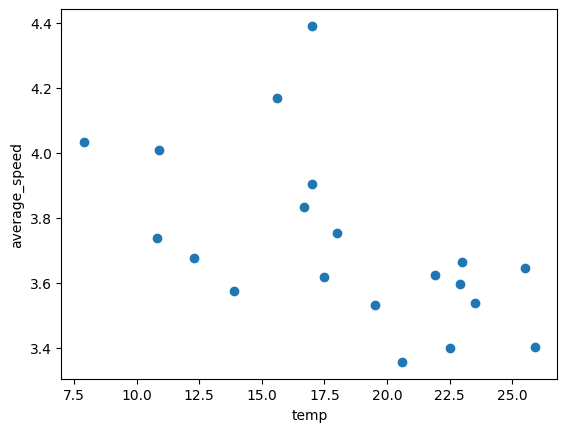

In [3]:
# create a scatter plot
plt.scatter(lst_x, lst_y)
plt.xlabel(x)
plt.ylabel(y)

# Performance from Specific Runs
This section will focus on analyzing the performance from specific runs, including visualizations and statistical summaries.

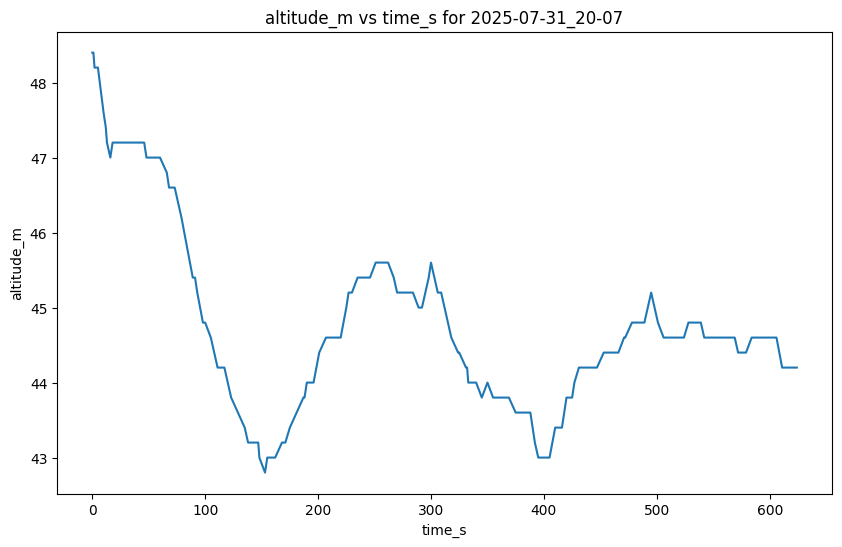

In [4]:
# date to analyze
date = "2025-07-31"

x = "time_s"
y = "altitude_m"
# y = "cadence_rpm"

# x_list = []
# y_list = []

# loop through all folders in the output folder
for folder_name in os.listdir(output_folder):
    if date in folder_name:
        # first read the csv file
        csv_file_path = os.path.join(output_folder, folder_name, f"{folder_name}_streams.csv")
        data = pd.read_csv(csv_file_path)

        # get the time and cadence columns
        x_data = data[x]
        y_data = data[y]

        # plot this data
        plt.figure(figsize=(10, 6))
        plt.plot(x_data, y_data, label=folder_name)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"{y} vs {x} for {folder_name}")
        plt.show()

